<a href="https://colab.research.google.com/github/Sayali1008/Titanic-Machine-Learning-from-Disaster/blob/execution/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Helpful Links:

[Building Classification Model with Python](https://medium.com/analytics-vidhya/building-classification-model-with-python-9bdfc13faa4b)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Loading Data

In [2]:
df_train = pd.read_csv("titanic/train.csv")
df_test = pd.read_csv("titanic/test.csv")

NameError: ignored

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print('Shape of dataframe:', df_train.shape)
df_train.head()

Shape of dataframe: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Unique values for categorical data
print(f"Unique values for Sex: \n {df_train['Sex'].unique()}")
print(f"Unique values for Embarked: \n {df_train['Embarked'].unique()}")
print(f"Unique values for Pclass: \n {df_train['Pclass'].unique()}")

Unique values for Sex: 
 ['male' 'female']
Unique values for Embarked: 
 ['S' 'C' 'Q' nan]
Unique values for Pclass: 
 [3 1 2]


## Data Visualization

### Correlation Matrix


---

***Notes about Correlation Heatmaps***:

Here's what you can gather from a correlation heatmap:

***Positive correlation***: When two variables have a high positive correlation, it means that as one variable increases, the other variable also tends to increase. In the heatmap, positive correlations are displayed in shades of red.

***Negative correlation***: When two variables have a high negative correlation, it means that as one variable increases, the other variable tends to decrease. In the heatmap, negative correlations are displayed in shades of blue or purple.

***No correlation***: When two variables have no linear relationship, the correlation coefficient is close to 0. In the heatmap, no correlation is displayed as a color near the center of the color gradient, typically gray or white.

The intensity of the color represents the strength of the correlation. The closer the correlation coefficient is to 1 or -1, the more intense the color.

Remember that correlation does not imply causation. While a high positive correlation may suggest a relationship between two variables, it doesn't necessarily mean that one variable causes the other.

*Reference: [Blackbox AI](https://www.blackbox.ai/)*

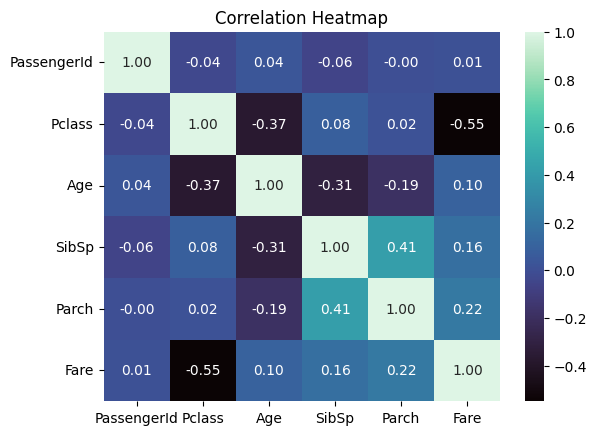

In [ ]:
plt.clf()
corr = df_train.loc[:, df_train.columns != 'Survived'].corr(numeric_only=True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt=".2f", cmap="mako")
plt.title('Correlation Heatmap')
plt.show()

### Sex Ratio for Survival


---


***Observation***: Out of the number of survivors, a significantly higher percentage were female. Hence, the data is highly imbalanced.

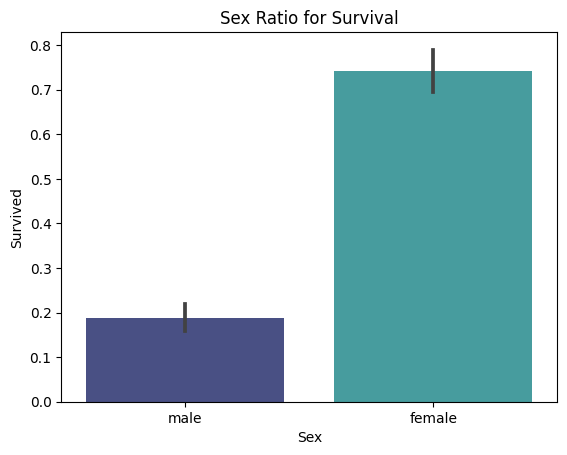

In [ ]:
plt.clf()
sns.barplot(data = df_train, x = 'Sex', y = 'Survived', palette = 'mako')
plt.title('Sex Ratio for Survival')
plt.show()

### Distribution of survival rate based on socio-economic status (ticket class)


---

***Observation***: People with upper class ticket had the highest survival count, followed by middle class, and finally lower class.

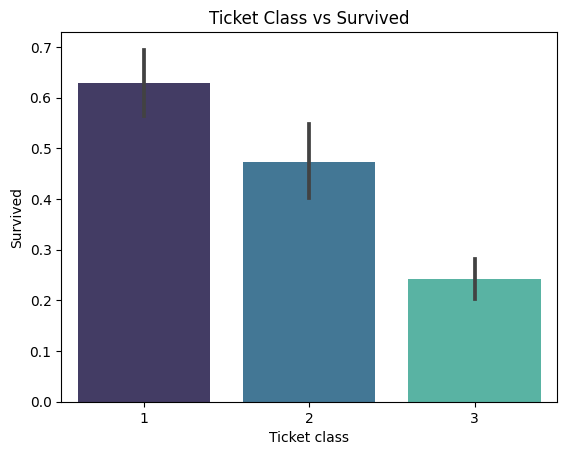

In [ ]:
plt.clf()
sns.barplot(data = df_train, x = 'Pclass', y = 'Survived', palette = 'mako')
plt.title('Ticket Class vs Survived')
plt.xlabel('Ticket class')
plt.ylabel('Survived')
plt.show()

### Distribution of survival rate based on port of embarkation


---

***Observation***: People who embarked at Cherbourg (C) had the higheest survival count.

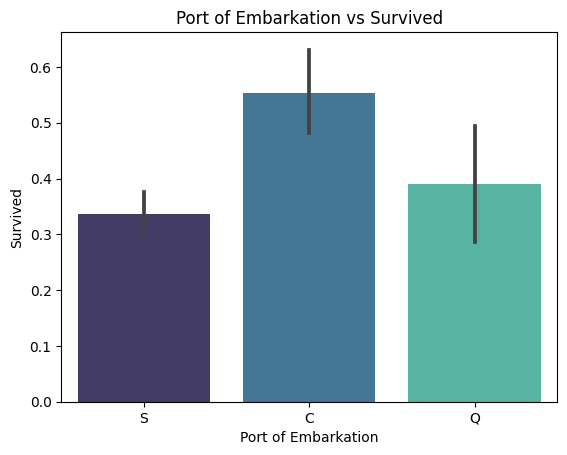

In [ ]:
plt.clf()
sns.barplot(data = df_train, x = 'Embarked', y = 'Survived', palette = 'mako')
plt.title('Port of Embarkation vs Survived')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survived')
plt.show()

## Class Distribution

In [ ]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## Handling Missing Values


---

***Observation***:
1. `df_train['Embarked']` has 2 null values
2. `df_train['Cabin']` has 687 null values
3. `df_train['Age']` has 177 null values

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_train.loc[:, df_train.isnull().any(axis=0)]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


## Drop Unnecessary Columns

In [ ]:
# Drop rows where Embarked == NaN
df_train.dropna(subset=['Embarked'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Drop Age and Cabin
df_train.drop(columns = ['Age', 'Cabin'], axis = 1, inplace = True)

In [ ]:
# Drop PassengerId, Name, Ticket, Fare
df_train.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Fare'], axis = 1, inplace = True)

## Scale Numeric Data

## Encoding Categorical Data

In [ ]:
# One hot encode Sex
df_train = pd.get_dummies(df_train, columns = ['Sex'])

In [ ]:
# One hot encode Embarked
df_train = pd.get_dummies(df_train, columns = ['Embarked'])

In [ ]:
df_train

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,0,1,0,0,1
1,1,1,1,0,1,0,1,0,0
2,1,3,0,0,1,0,0,0,1
3,1,1,1,0,1,0,0,0,1
4,0,3,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,0,0,1
887,1,1,0,0,1,0,0,0,1
888,0,3,1,2,1,0,0,0,1
889,1,1,0,0,0,1,1,0,0


## Apply Data Preprocessing Changes to Test Data

In [ ]:
# Handle missing values
df_test.loc[:, df_test.isnull().any(axis=0)]

# Drop unnecessary columns
df_test.dropna(subset=['Embarked'])
df_test.drop(columns = ['Age', 'Cabin'], axis = 1, inplace = True)
df_test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Fare'], axis = 1, inplace = True)

# Scale numeric data

# Encode categorical data
df_test = pd.get_dummies(df_test, columns = ['Sex'])
df_test = pd.get_dummies(df_test, columns = ['Embarked'])

In [ ]:
df_test

,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,0,0,1,0,1,0
1,3,1,0,1,0,0,0,1
2,2,0,0,0,1,0,1,0
3,3,0,0,0,1,0,0,1
4,3,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...
413,3,0,0,0,1,0,0,1
414,1,0,0,1,0,1,0,0
415,3,0,0,0,1,0,0,1
416,3,0,0,0,1,0,0,1


## Split Dataset for Training and Testing

In [ ]:
def preprocess_data(df):
    # Handling missing values
    df.loc[:, df.isnull().any(axis=0)]

    # Drop NaN rows for Embarked
    df.dropna(subset=['Embarked'])

    # Drop unnecessary columns
    df.drop(columns = ['Age', 'Cabin', 'PassengerId', 'Name', 'Ticket', 'Fare'], axis = 1, inplace = True)

    # One hot encode categorical data
    df = pd.get_dummies(df, columns = ['Sex'])
    df = pd.get_dummies(df, columns = ['Embarked'])

    df = df.sample(frac = 1)

    return df

In [ ]:
def handle_imbalanced_data(df):
    class0 = df[df['Survived'] == 0][:342]
    class1 = df[df['Survived'] == 1]

    df_balanced = pd.concat([class0, class1])
    df_balanced = df_balanced.sample(frac = 1)

    return df_balanced

In [ ]:
df_train = pd.read_csv("titanic/train.csv")
df_test = pd.read_csv("titanic/test.csv")

In [ ]:
df_train = preprocess_data(df_train)
df_train = handle_imbalanced_data(df_train)
df_test = preprocess_data(df_test)

In [ ]:
df_train.columns, df_test.columns

(Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
        'Embarked_C', 'Embarked_Q', 'Embarked_S'],
       dtype='object'),
 Index(['Pclass', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C',
        'Embarked_Q', 'Embarked_S'],
       dtype='object'))

In [ ]:
x_train = df_train.iloc[:, df_train.columns != 'Survived']
y_train = df_train.iloc[:, df_train.columns == 'Survived']

x_test = df_test.copy()

In [ ]:
x_train.shape, x_test.shape

((684, 8), (418, 8))

## Model Training

In [ ]:
class LogisticRegression():
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def weight_initialization(self, X):
        self.weights = np.zeros((X.shape[1], 1))
        self.bias = 0

    def sigmoid(self, y):
        return 1 / (1 + np.exp(-y))

    def compute_gradients(self, X, y, y_pred):
        difference = y_pred - y
        dw = (1 / self.num_samples) * np.dot(X.T, difference)
        db = (1 / self.num_samples) * np.sum(difference)
        return dw, db

    def compute_loss(self, y_true, y_pred):
        # Binary cross entropy loss (Log loss)
        loss = - y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
        return np.mean(loss)

    def fit(self, X, y):
        # Define variables
        self.num_samples, self.num_features = X.shape
        train_loss = []
        train_acc = []
        parts = int(self.epochs // 10)

        # Initialize weights
        self.weight_initialization(X)

        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(y_pred)
            y_pred = np.reshape(y_pred, (y_pred.shape[0], 1))

            # Calculate accuracy
            y_pred_list = np.array([1 if y_pred[i] > 0.5 else 0 for i in range(len(y_pred))])
            acc = accuracy_score(y, y_pred_list)
            train_acc.append(acc)

            # Calculate loss
            loss = self.compute_loss(y, y_pred)
            train_loss.append(loss)

            # Update model parameters
            dw, db = self.compute_gradients(X, y, y_pred)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Print
            if epoch % parts == 0:
                print(f"Epoch {epoch}: Train accuracy: {acc} \t Train loss: {loss}")

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(y_pred)
        return [1 if y_pred[i] > 0.5 else 0 for i in range(len(y_pred))]

In [ ]:
def main():
    # Loading data
    df_train = pd.read_csv("titanic/train.csv")
    df_test = pd.read_csv("titanic/test.csv")

    # Data preprocessing
    df_train = preprocess_data(df_train)
    df_train = handle_imbalanced_data(df_train)
    df_test = preprocess_data(df_test)

    # Split dataset into train, val and test

    X_train = df_train.iloc[:, df_train.columns != 'Survived']
    y_train = df_train['Survived']
    y_train = np.reshape(y_train, (y_train.shape[0],))
    X_test = df_test.copy()

    # Model training
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Model prediction
    y_pred = model.predict(X_test)

    # Model evaluation


In [ ]:
# Loading data
df_train = pd.read_csv("titanic/train.csv")
df_test = pd.read_csv("titanic/test.csv")

# Data preprocessing
df_train = preprocess_data(df_train)
df_train = handle_imbalanced_data(df_train)
df_test = preprocess_data(df_test)

# # Split dataset into train and test
X_train = df_train.iloc[:, df_train.columns != 'Survived']
y_train = df_train['Survived'].to_numpy()
y_train = np.reshape(y_train, (y_train.shape[0], 1))
X_test = df_test.copy()

# # Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Model prediction
y_pred = model.predict(X_test)



Epoch 0: Train accuracy: 0.5 	 Train loss: 0.6931471805599454
Epoch 100: Train accuracy: 0.6695906432748538 	 Train loss: 0.6521068805897318
Epoch 200: Train accuracy: 0.7616959064327485 	 Train loss: 0.6240547606360081
Epoch 300: Train accuracy: 0.7719298245614035 	 Train loss: 0.6020183181676795
Epoch 400: Train accuracy: 0.7646198830409356 	 Train loss: 0.5844722278646265
Epoch 500: Train accuracy: 0.7646198830409356 	 Train loss: 0.5703465902156241
Epoch 600: Train accuracy: 0.7646198830409356 	 Train loss: 0.5588507294431422
Epoch 700: Train accuracy: 0.7646198830409356 	 Train loss: 0.549396125530696
Epoch 800: Train accuracy: 0.7646198830409356 	 Train loss: 0.5415413517219297
Epoch 900: Train accuracy: 0.7646198830409356 	 Train loss: 0.5349525170763874


In [ ]:
# Model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_pred)


[1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 

In [ ]:
# sklearn model
from sklearn import linear_model


# Loading data
df_train = pd.read_csv("titanic/train.csv")
df_test = pd.read_csv("titanic/test.csv")

# Data preprocessing
df_train = preprocess_data(df_train)
df_train = handle_imbalanced_data(df_train)
df_test = preprocess_data(df_test)

# # Split dataset into train and test
X_train = df_train.iloc[:, df_train.columns != 'Survived']
y_train = df_train['Survived'].to_numpy()
y_train = np.reshape(y_train, (y_train.shape[0], 1))
X_test = df_test.copy()

# # Model training
logreg = linear_model.LogisticRegression(max_iter = 1000, penalty = 'l1', solver = 'liblinear')
logreg.fit(X_train, y_train)

# Model prediction
y_pred = logreg.predict(X_train)
acc = accuracy_score(y_train, y_pred)
acc

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.77046783625731

# Using OOP based code

In [33]:
!python main.py

Epoch 0: Train accuracy: 0.49725776965265084 	 Train loss: 0.6931471805599453
Epoch 100: Train accuracy: 0.6691042047531993 	 Train loss: 0.6541763754075531
Epoch 200: Train accuracy: 0.7221206581352834 	 Train loss: 0.6270146093206779
Epoch 300: Train accuracy: 0.7605118829981719 	 Train loss: 0.6056969070302636
Epoch 400: Train accuracy: 0.7605118829981719 	 Train loss: 0.5886927945410807
Epoch 500: Train accuracy: 0.7605118829981719 	 Train loss: 0.5749546407377611
Epoch 600: Train accuracy: 0.7605118829981719 	 Train loss: 0.5637242558797896
Epoch 700: Train accuracy: 0.7605118829981719 	 Train loss: 0.5544434738086688
Epoch 800: Train accuracy: 0.7605118829981719 	 Train loss: 0.5466955367999753
Epoch 900: Train accuracy: 0.7605118829981719 	 Train loss: 0.5401654298054677
CustomLogisticRegression	Accuracy: 0.8394160583941606
LogisticRegression\yAccuracy: 0.7956204379562044


In [10]:
# !git add .
# !git config --global user.email "moghesayali@gmail.com"
# !git config --global user.name "Sayali1008"
# !git commit -m "trying to push .py files from Colab"
# !git push

On branch execution
Your branch is ahead of 'origin/execution' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


fatal: could not read Username for 'https://github.com': No such device or address
